In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

In [2]:
%matplotlib inline

In [17]:
transactions = pd.read_csv("exp01.csv",skiprows=1,sep=";")

In [18]:
transactions.describe()

,time,transaction,price,volume
count,26745.000000,26745.000000,26745.000000,26745.000000
mean,25058.029950,13373.000000,30.410388,46.379323
std,14428.948781,7720.760811,23.789656,28.633024
min,3.000000,1.000000,0.010000,1.000000
25%,12558.000000,6687.000000,12.830000,21.000000
50%,25130.000000,13373.000000,24.930000,45.000000
75%,37476.000000,20059.000000,41.600000,70.000000
max,49999.000000,26745.000000,198.550000,100.000000


In [19]:
#Convert time to days
transactions.loc[:,'time'] //= 200

In [20]:
df = transactions[['time','price','volume']]

In [21]:
#Convert it to "long-form" or "tidy" representation
df = pd.melt(df, id_vars=["time"], var_name="condition")

'# Calculate the 25th and 75th percentiles of the data\n# and plot a translucent band between them\nfor cond, cond_df in df.groupby("condition"):\n    low = cond_df.groupby("time").value.apply(np.percentile, 25)\n    high = cond_df.groupby("time").value.apply(np.percentile, 75)\n    ax.fill_between(x, low, high, alpha=.2, color=palette.pop(0))'

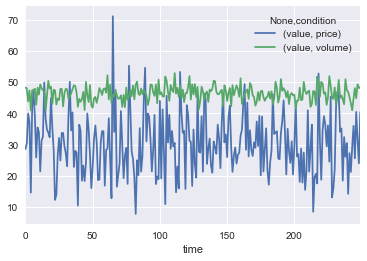

In [22]:
# Plot the average value by condition and date
ax = df.groupby(["condition", "time"]).mean().unstack("condition").plot()
# Get a reference to the x-points corresponding to the dates and the the colors
x = np.arange(len(df.time.unique()))
palette = sns.color_palette()

"""# Calculate the 25th and 75th percentiles of the data
# and plot a translucent band between them
for cond, cond_df in df.groupby("condition"):
    low = cond_df.groupby("time").value.apply(np.percentile, 25)
    high = cond_df.groupby("time").value.apply(np.percentile, 75)
    ax.fill_between(x, low, high, alpha=.2, color=palette.pop(0))"""


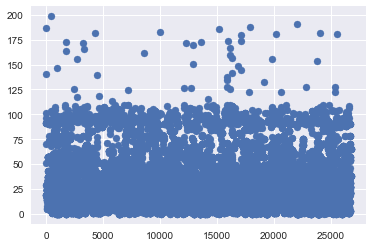

In [23]:
plt.scatter(y=transactions.price,x=transactions.transaction)